In [1]:
#加载模型库
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sp
import matplotlib.pyplot as plt

In [38]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


In [3]:
#读取数据
def get_data(path):
    return pd.read_excel(path)


#数据分段
def split(data,start,end):
    return data[start:end]

In [173]:
#线性回归，返回预测值和残差
def lr(x,y):
    x1 = sp.add_constant(x)
    model = sp.OLS(y,x1)
    results=model.fit()
    print(results.summary())
    y_pred=model.predict(results.params,x1)
    outliers = results.get_influence()
    resids1 = outliers.resid_studentized_external 
    plt.figure(figsize=(8,8))
    print('残差：')
    print(resids1)
    plt.subplot(2,1,2)
    plt.hist(resids1)
    plt.subplot(2,1,1)
    plt.plot(x,y,'.')
    plt.plot([min(x),max(x)],[min(x)*(results.params[1])+results.params[0],
                             max(x)*(results.params[1])+results.params[0]])
   # return y_pred,resids1


In [5]:
path = '../新冠/xinguan.xlsx'

In [6]:
data = get_data(path)

In [7]:
data.head()

,date,quezhen,wu,quewu,time_code
0,2022-03-12,1,64,65,1
1,2022-03-13,41,128,169,2
2,2022-03-14,9,130,139,3
3,2022-03-15,5,197,202,4
4,2022-03-16,8,150,158,5


In [25]:
### 日期、确诊、无症状、确诊+无症状、日期编号
data_date = data['date'].values
data_quezhen = data['quezhen'].values
data_wu = data['wu'].values
data_quewu = data['quewu'].values
data_time_code = data['time_code'].values

# 各个散点图

Text(0.5, 1.0, '确诊病例和无症状感染者')

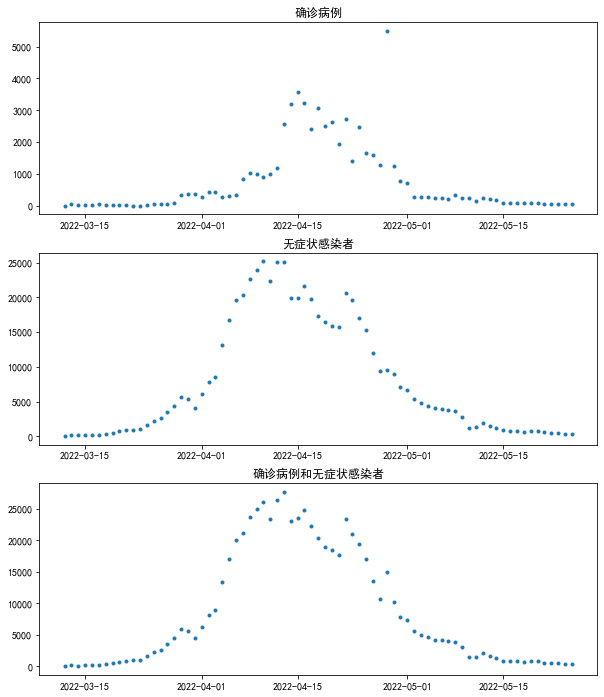

In [39]:
#各种需要的散点图
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.plot(data_date,data_quezhen,'.')
plt.title('确诊病例')
#plt.xticks(data_time_code,data_date,)
plt.subplot(3,1,2)
plt.plot(data_date,data_wu,'.')
plt.title('无症状感染者')
plt.subplot(3,1,3)
plt.plot(data_date,data_quewu,'.')
plt.title('确诊病例和无症状感染者')

# 确诊和无症状的关系

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     63.62
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.56e-11
Time:                        15:56:36   Log-Likelihood:                -759.14
No. Observations:                  75   AIC:                             1522.
Df Residuals:                      73   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3939.6293    859.967      4.581      0.0

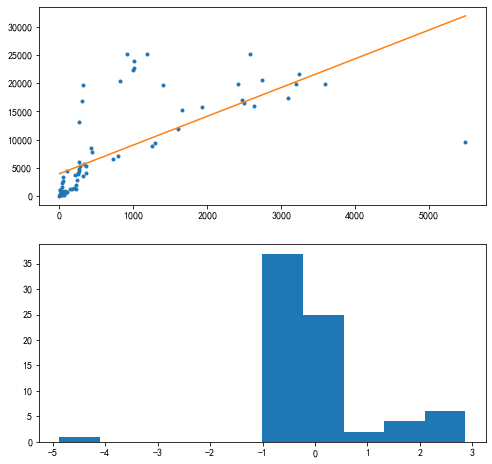

In [171]:
#无症状感染者和确诊病例的关系，x是确诊，y是无症状
lr(data_quezhen,data_wu)

# 确诊区间

In [161]:
#确诊病例分时间区间进行验证
qz_1_18 = split(data_quezhen,0,18)
time_1_18 = split(data_time_code,0,18)

qz_19_28 = split(data_quezhen,18,28)
time_19_28 = split(data_time_code,18,28)

qz_29_47 = split(data_quezhen,28,47)
time_29_47 = split(data_time_code,28,47)

qz_48_75 = split(data_quezhen,47,75)
time_48_75 = split(data_time_code,47,75)

F:\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     6.693
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0199
Time:                        16:19:57   Log-Likelihood:                -99.479
No. Observations:                  18   AIC:                             203.0
Df Residuals:                      16   BIC:                             204.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.9542     31.716     -0.881      0.3

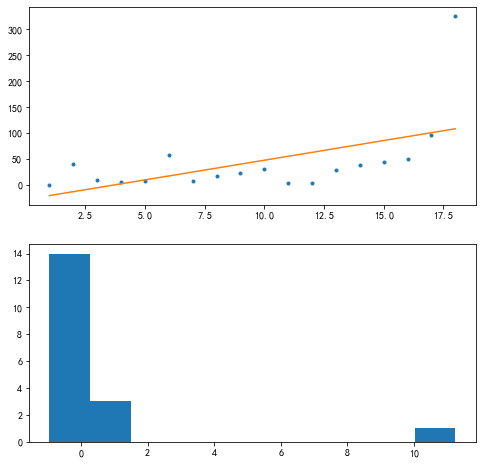

In [174]:
lr(time_1_18,qz_1_18)

F:\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     5.782
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0429
Time:                        16:20:15   Log-Likelihood:                -66.326
No. Observations:                  10   AIC:                             136.7
Df Residuals:                       8   BIC:                             137.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -820.5152    535.505     -1.532      0.1

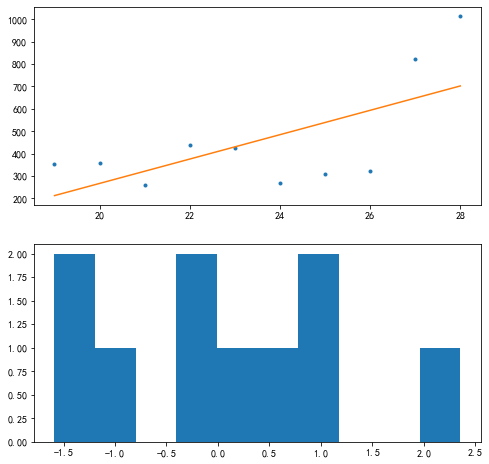

In [175]:
lr(time_19_28,qz_19_28)

F:\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.1002
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.755
Time:                        16:20:16   Log-Likelihood:                -154.73
No. Observations:                  19   AIC:                             313.5
Df Residuals:                      17   BIC:                             315.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1684.4667   1415.494      1.190      0.2

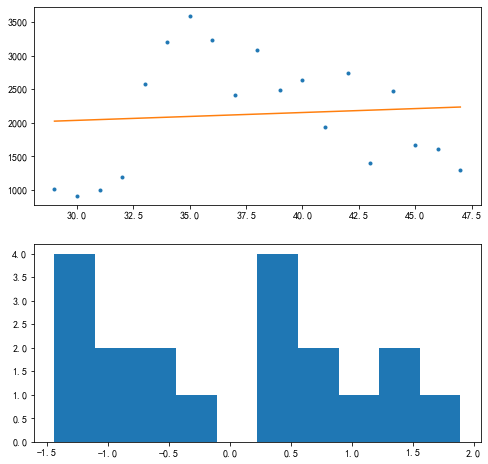

In [176]:
lr(time_29_47,qz_29_47)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     8.365
Date:                Tue, 31 May 2022   Prob (F-statistic):            0.00763
Time:                        16:20:18   Log-Likelihood:                -229.46
No. Observations:                  28   AIC:                             462.9
Df Residuals:                      26   BIC:                             465.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4214.8489   1320.029      3.193      0.0

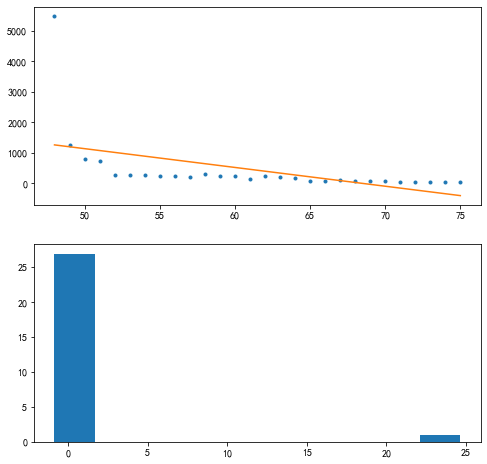

In [177]:
lr(time_48_75,qz_48_75)

# 无症状区间

In [178]:
wu_1_10 = split(data_wu,0,10)
time_1_10 = split(data_time_code,0,10)

wu_11_23 = split(data_wu,10,23)
time_11_23 = split(data_time_code,10,23)

wu_24_54 = split(data_quezhen,23,54)
time_24_54 = split(data_time_code,23,54)

wu_55_75 = split(data_quezhen,54,75)
time_55_75 = split(data_time_code,54,75)

F:\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     39.98
Date:                Tue, 31 May 2022   Prob (F-statistic):           0.000227
Time:                        16:20:22   Log-Likelihood:                -60.976
No. Observations:                  10   AIC:                             126.0
Df Residuals:                       8   BIC:                             126.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.8000     82.198     -1.555      0.1

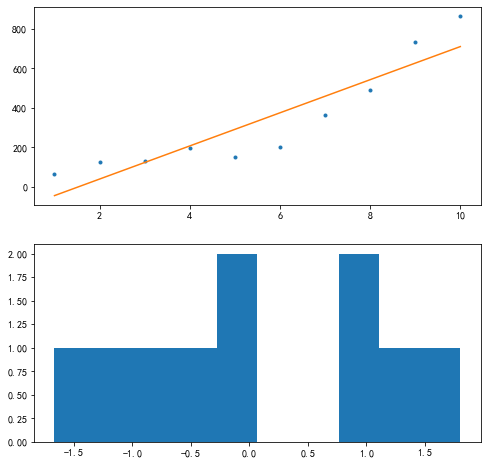

In [179]:
lr(time_1_10,wu_1_10)

F:\python\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     127.3
Date:                Tue, 31 May 2022   Prob (F-statistic):           2.19e-07
Time:                        16:20:22   Log-Likelihood:                -103.04
No. Observations:                  13   AIC:                             210.1
Df Residuals:                      11   BIC:                             211.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6218.0549    939.642     -6.617      0.0

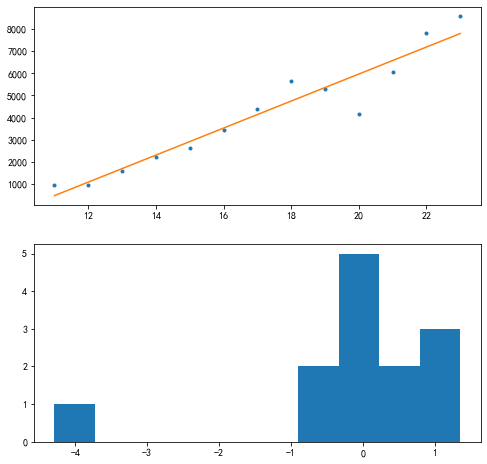

In [180]:
lr(time_11_23,wu_11_23)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.1340
Date:                Tue, 31 May 2022   Prob (F-statistic):              0.717
Time:                        16:20:22   Log-Likelihood:                -264.29
No. Observations:                  31   AIC:                             532.6
Df Residuals:                      29   BIC:                             535.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1322.9153   1013.310      1.306      0.2

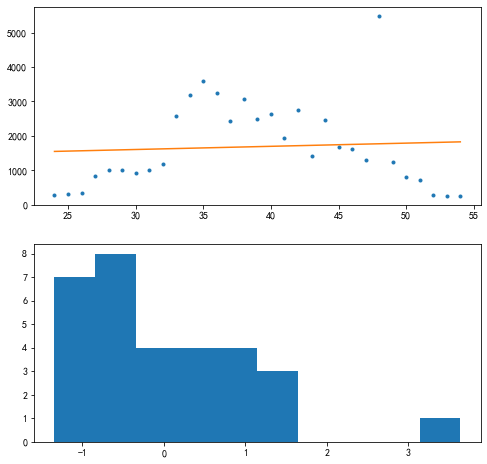

In [181]:
lr(time_24_54,wu_24_54)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     87.40
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.54e-08
Time:                        16:20:31   Log-Likelihood:                -104.87
No. Observations:                  21   AIC:                             213.7
Df Residuals:                      19   BIC:                             215.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.4848     88.258     10.917      0.0

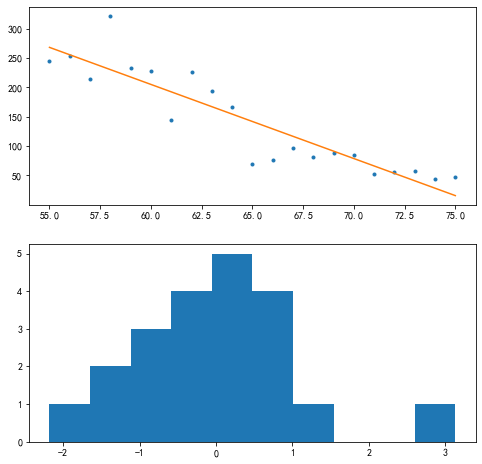

In [183]:
lr(time_55_75,wu_55_75)